<a href="https://www.kaggle.com/code/doauinc/air-quality?scriptVersionId=236106458" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Air Quality Through the Day: Analyzing Pollution Cycles Using Hourly Sensor Data


In [49]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/air-quality-data/AirQualityData.csv


| Column      | Description                                      | Unit       |
|-------------|--------------------------------------------------|------------|
| **Date**    | Date of recording (YYYY-MM-DD)                   | -          |
| **Time**    | Time of recording (HH:MM)                        | -          |
| **CO(GT)**  | Carbon monoxide concentration                    | mg/m³      |
| **NOx(GT)** | Nitrogen oxides concentration                    | ppb        |
| **NO2(GT)** | Nitrogen dioxide concentration                   | ppb        |
| **O3(GT)**  | Ozone concentration                              | ppb        |
| **SO2(GT)** | Sulfur dioxide concentration                     | ppb        |
| **PM2.5**   | Fine particulate matter (<2.5µm diameter)        | µg/m³      |
| **PM10**    | Coarse particulate matter (<10µm diameter)       | µg/m³      |
| **Temperature** | Ambient temperature                          | °C         |

In [50]:
df = pd.read_csv("/kaggle/input/air-quality-data/AirQualityData.csv")
df

,Date,Time,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
0,2024-01-01,00:00,3.807947,172.026768,144.333317,118.120832,1.215679,147.349671,208.803124,28.564580,...,209.984267,0.022008,1.183671,3.541778,343.353046,3.807947,144.333317,118.120832,0,0
1,2024-01-01,01:00,9.512072,241.824266,137.769318,15.325830,1.016178,40.979839,145.595579,6.793192,...,319.534890,0.039173,1.742635,0.727989,206.282028,6.660009,141.051317,66.723331,0,1
2,2024-01-01,02:00,7.346740,228.288118,20.055086,44.377036,24.140910,72.594740,26.155000,24.436552,...,274.644300,0.032042,10.842422,7.378322,140.170920,6.888920,100.719240,59.274566,0,2
3,2024-01-01,03:00,6.026719,47.016072,184.591909,139.488603,2.435392,134.339724,276.367944,26.463951,...,312.266023,0.125515,0.253330,21.684266,307.928588,7.628510,114.138771,66.397156,0,3
4,2024-01-01,04:00,1.644585,45.625591,114.125968,95.634768,48.752095,99.007422,294.295449,10.530331,...,21.392120,0.035272,0.396310,9.627596,370.134556,5.006015,106.257654,93.166802,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2024-06-15,11:00,4.476860,82.674726,1.924252,2.358863,43.974893,183.094419,72.636576,20.114346,...,207.417748,0.053503,28.272092,6.363195,469.874314,3.353590,68.664049,91.517995,5,11
3996,2024-06-15,12:00,3.410572,63.646248,174.860062,103.508034,3.293884,88.552254,244.969444,32.767753,...,27.268705,0.052757,0.361914,4.282310,147.142006,4.287844,124.111050,91.576961,5,12
3997,2024-06-15,13:00,4.006266,137.143296,62.157711,129.376453,15.881225,78.683868,92.032781,29.330901,...,186.572322,0.029001,2.171442,22.117135,457.255169,3.964566,79.647342,78.414450,5,13
3998,2024-06-15,14:00,5.346412,272.622827,187.779183,134.369351,22.722680,50.107361,20.002019,0.339514,...,31.488140,0.019539,1.444136,0.105293,406.534151,4.254416,141.598985,122.417946,5,14


In [51]:
print(df.isnull().sum())
df.describe()

Date                   0
Time                   0
CO(GT)                 0
NOx(GT)                0
NO2(GT)                0
O3(GT)                 0
SO2(GT)                0
PM2.5                  0
PM10                   0
Temperature            0
Humidity               0
Pressure               0
WindSpeed              0
WindDirection          0
CO_NOx_Ratio           0
NOx_NO2_Ratio          0
Temp_Humidity_Index    0
AirQualityIndex        0
CO_MA3                 0
NO2_MA3                0
O3_MA3                 0
DayOfWeek              0
Hour                   0
dtype: int64


,CO(GT),NOx(GT),NO2(GT),O3(GT),SO2(GT),PM2.5,PM10,Temperature,Humidity,Pressure,...,WindDirection,CO_NOx_Ratio,NOx_NO2_Ratio,Temp_Humidity_Index,AirQualityIndex,CO_MA3,NO2_MA3,O3_MA3,DayOfWeek,Hour
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,5.025385,148.126633,100.213189,89.914815,26.081045,104.765999,153.591417,17.305228,54.626284,999.862679,...,179.571724,0.082564,3.412176,9.418823,249.602455,5.025846,100.222672,89.901700,2.978000,11.484000
std,2.874632,85.999247,57.074947,52.003484,14.059684,56.344868,83.080911,12.943632,25.844003,28.897118,...,104.738760,0.215593,7.996062,8.982090,143.570929,1.672715,32.884870,30.505331,1.992614,6.919951
min,0.100115,1.009185,1.010513,1.055442,1.012370,5.009384,10.031967,-4.996963,10.000498,950.018004,...,0.033694,0.000389,0.006021,-4.824570,0.052355,0.612983,3.702628,7.453898,0.000000,0.000000
25%,2.514242,73.636615,51.326622,44.179487,14.220565,56.544378,82.200105,6.092531,31.970628,975.018939,...,86.409827,0.017033,0.719052,2.551932,124.521801,3.846779,77.100651,68.321846,1.000000,5.000000
50%,5.054973,146.440690,99.508855,88.956924,26.321359,105.502686,154.714484,17.184773,55.113650,999.857722,...,179.401393,0.034021,1.467460,6.975287,250.552671,5.042259,100.128466,90.452301,3.000000,11.000000
75%,7.524652,221.823697,149.666167,136.333683,37.833728,153.751364,222.969347,28.573093,76.311009,1024.763352,...,272.370032,0.065973,2.789423,14.752847,370.997732,6.206658,123.919621,111.337587,5.000000,17.000000
max,9.997205,299.838744,199.934968,179.986544,49.993700,199.980691,299.911727,39.987944,99.981043,1049.926869,...,359.984504,4.078615,131.169948,39.372679,499.920650,9.471079,190.781333,173.546840,6.000000,23.000000


In [52]:
# Convert 'Date' and 'Time' to datetime
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))

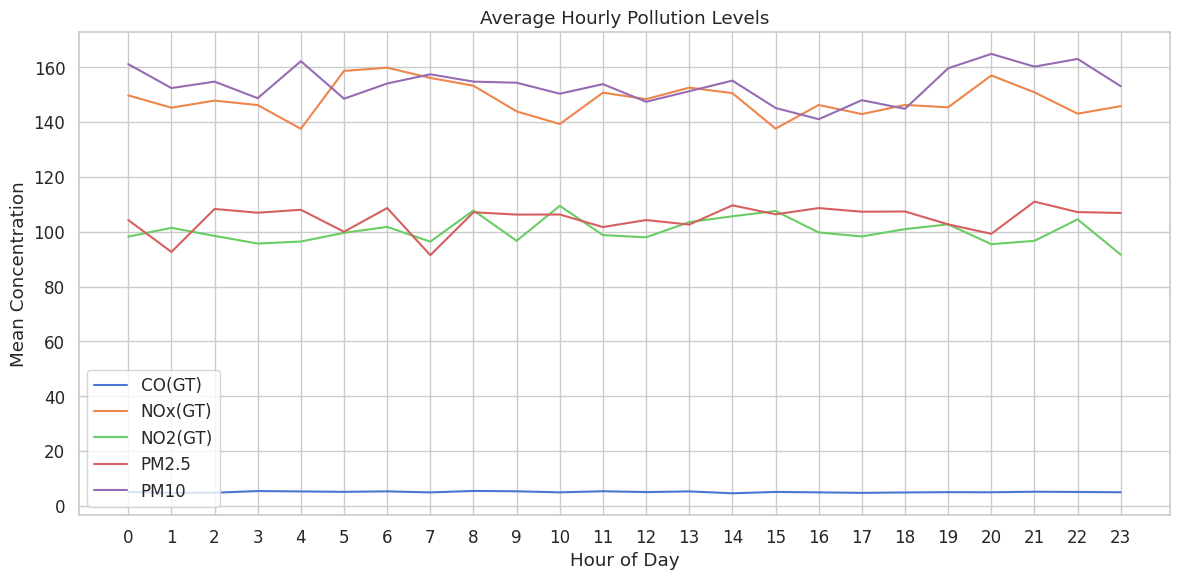

In [53]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Plot hourly average for selected pollutants
pollutants = ['CO(GT)', 'NOx(GT)', 'NO2(GT)', 'PM2.5', 'PM10']
hourly_avg = df.groupby('Hour')[pollutants].mean()

plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(hourly_avg.index, hourly_avg[pollutant], label=pollutant)

plt.title('Average Hourly Pollution Levels')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Concentration')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

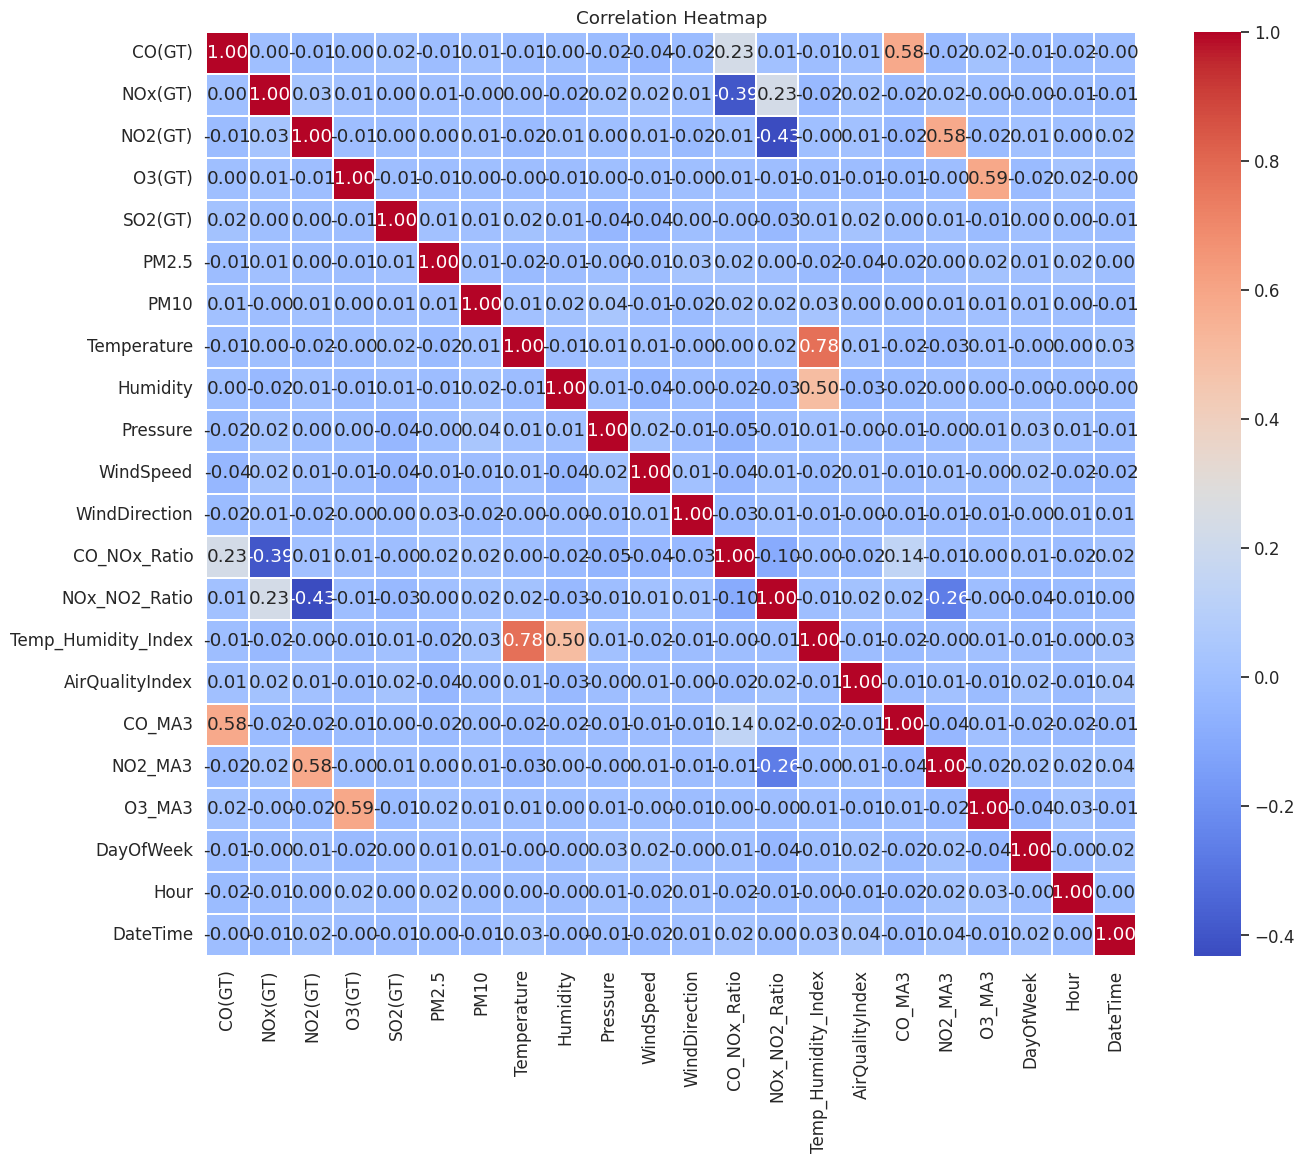

In [54]:
plt.figure(figsize=(15,12))
sns.heatmap(df.drop(columns=['Date', 'Time']).corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.3)
plt.title("Correlation Heatmap")
plt.show()

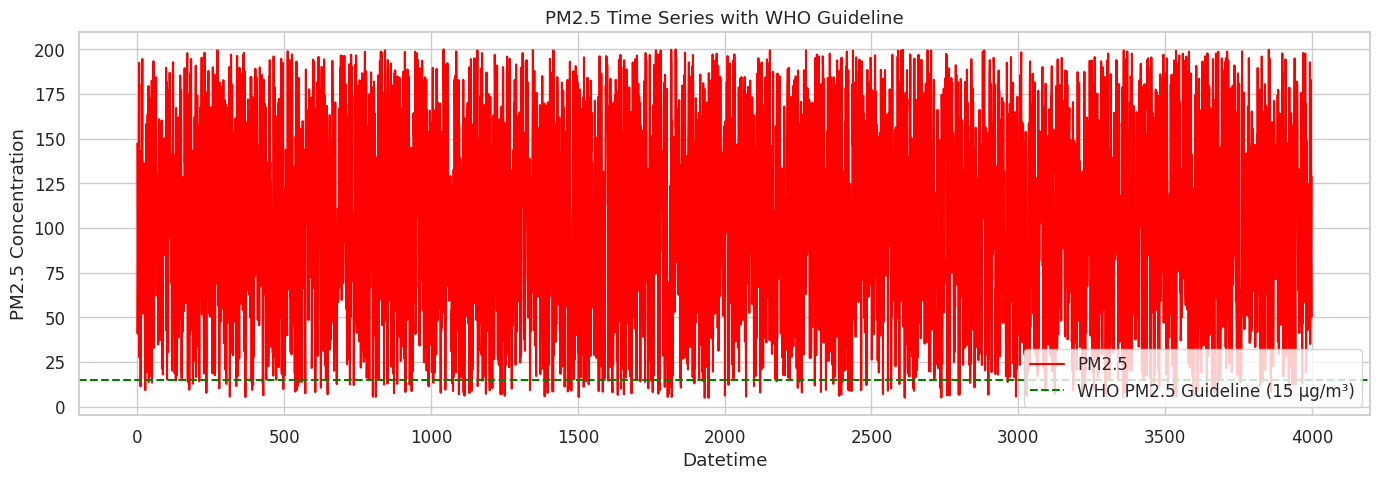

PM2.5 exceeded WHO limit 95.3% of the time.


In [55]:
plt.figure(figsize=(14, 5))
df['PM2.5'].plot(label='PM2.5', color='red')
plt.axhline(y=15, color='green', linestyle='--', label='WHO PM2.5 Guideline (15 µg/m³)')
plt.title('PM2.5 Time Series with WHO Guideline')
plt.xlabel('Datetime')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# WHO guideline = 15 µg/m³
exceedances = df['PM2.5'] > 15
percent_exceed = exceedances.sum() / len(df) * 100
print(f"PM2.5 exceeded WHO limit {percent_exceed:.1f}% of the time.")


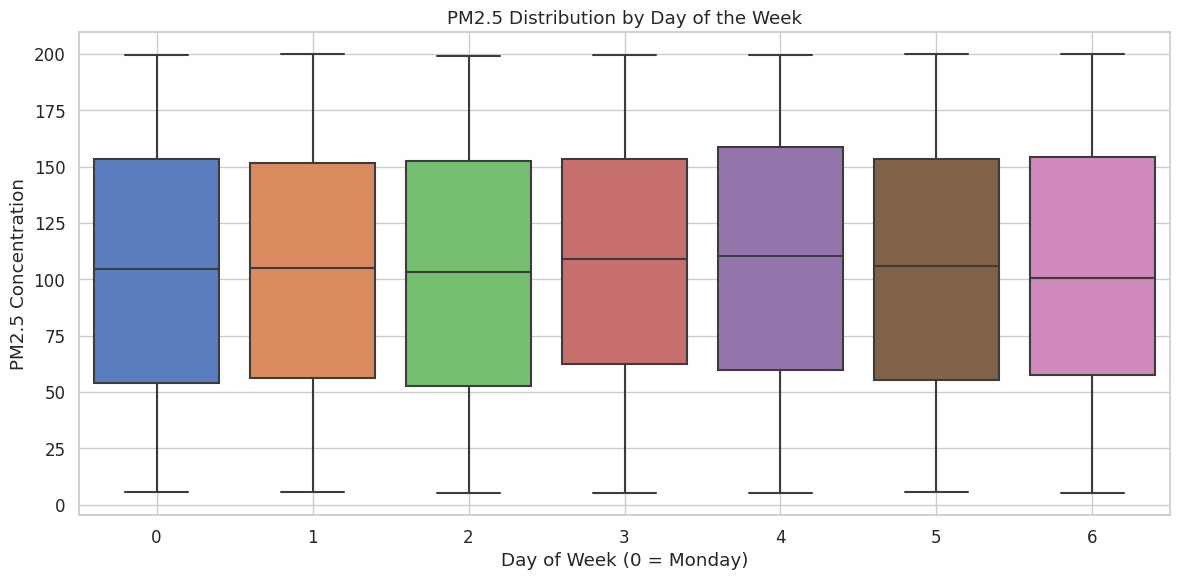

In [56]:
# Boxplot by day of week (0=Monday, 6=Sunday)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='DayOfWeek', y='PM2.5')
plt.title('PM2.5 Distribution by Day of the Week')
plt.xlabel('Day of Week (0 = Monday)')
plt.ylabel('PM2.5 Concentration')
plt.grid(True)
plt.tight_layout()
plt.show()

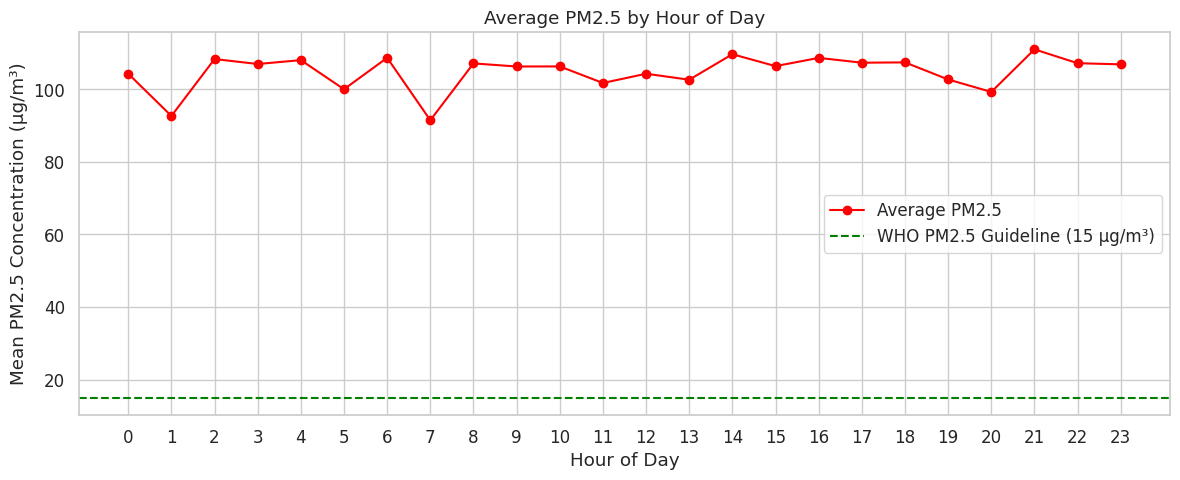

In [57]:
# Group by hour and calculate mean
hourly_avg = df.groupby('Hour')['PM2.5'].mean()

plt.figure(figsize=(12, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o', color='red', label='Average PM2.5')
plt.axhline(y=15, color='green', linestyle='--', label='WHO PM2.5 Guideline (15 µg/m³)')

plt.title('Average PM2.5 by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean PM2.5 Concentration (µg/m³)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Although the dataset only spans 6 months, it reveals consistently elevated PM2.5 levels, far exceeding WHO guidelines more than 95% of the time. 

Patterns do not vary significantly by time of day or day of week, suggesting persistent, non-cyclical pollution sources likely tied to structural emissions.


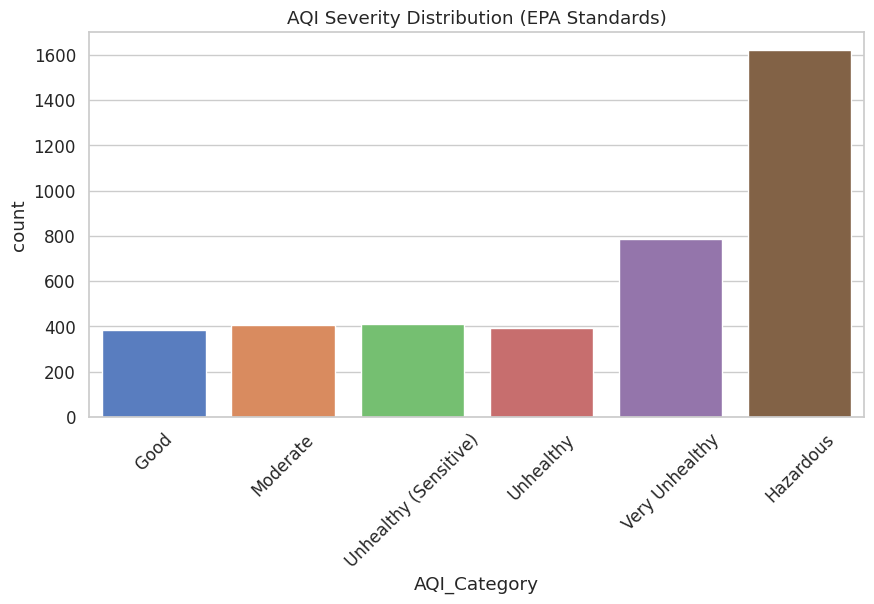

In [58]:
# Classify AQI into health buckets (US EPA standard)
bins = [0, 50, 100, 150, 200, 300, 500]
labels = ['Good', 'Moderate', 'Unhealthy (Sensitive)', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
df['AQI_Category'] = pd.cut(df['AirQualityIndex'], bins=bins, labels=labels)

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='AQI_Category', order=labels)
plt.title('AQI Severity Distribution (EPA Standards)')
plt.xticks(rotation=45)
plt.show()

In [59]:
df['PM_Ratio'] = df['PM2.5'] / df['PM10']
ratio_above_05 = (df['PM_Ratio'] > 0.5).mean() * 100

print(f"PM2.5/PM10 > 0.5 in {ratio_above_05:.1f}% of observations")

PM2.5/PM10 > 0.5 in 64.6% of observations


##### >50% of ratios > 0.5: Strong evidence of combustion sources (vehicles, industry, biomass burning).
##### <50%: Mixed sources (e.g., dust + combustion).

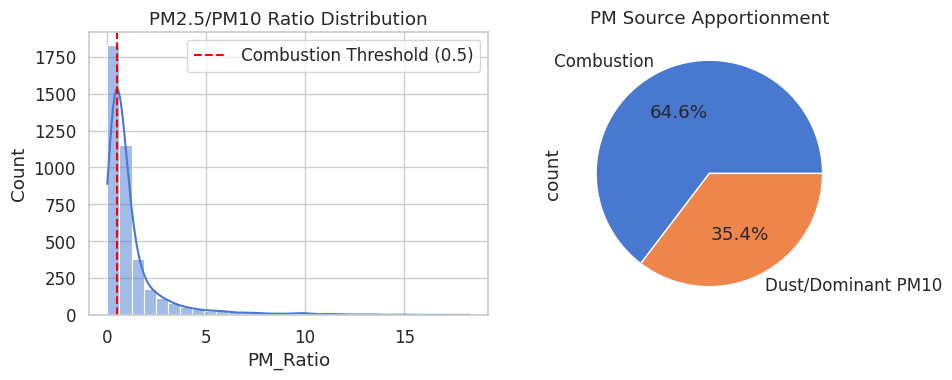

In [60]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['PM_Ratio'], bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Combustion Threshold (0.5)')
plt.legend()
plt.title('PM2.5/PM10 Ratio Distribution')

plt.subplot(1, 2, 2)
df['PM_Source'] = np.where(df['PM_Ratio'] > 0.5, 'Combustion', 'Dust/Dominant PM10')
df['PM_Source'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('PM Source Apportionment')
plt.tight_layout()
plt.show()

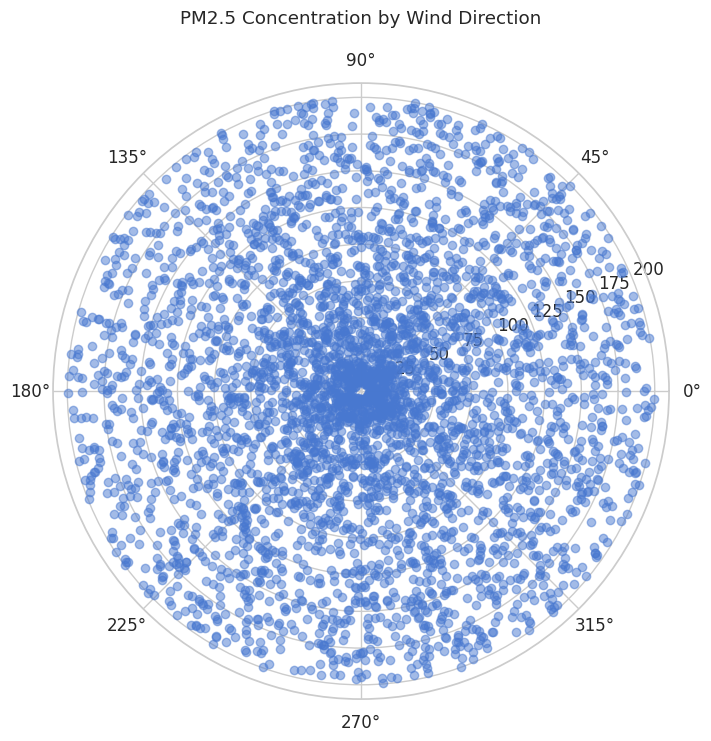

In [61]:
# Polar plot of PM2.5 by wind direction
theta = np.radians(df['WindDirection'])
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.scatter(theta, df['PM2.5'], alpha=0.5)
ax.set_title('PM2.5 Concentration by Wind Direction', pad=20)
plt.show()

Wind direction/speed show no patterns (homogeneous):

This might indicate that pollution sources are so overwhelming that wind (which usually disperses pollutants) has no measurable effect.

Pollution may also originate from distant sources (e.g., wildfires or industrial zones) rather than local point sources.

## Can we predict AQI from the other features?

In this section, we explore whether the Air Quality Index (AQI) can be predicted from available environmental and pollutant data. Since AQI is widely used as a public health metric, a reliable model could enable short-term air quality forecasts and early warnings. We use features such as PM2.5, PM10, CO, NO₂, temperature, and wind speed to predict AQI using a Random Forest regression model.

This serves as a first step in understanding which variables contribute most to air quality and whether it's feasible to learn AQI patterns from underlying sensor data.

MAE: 125.51
R²: -0.02


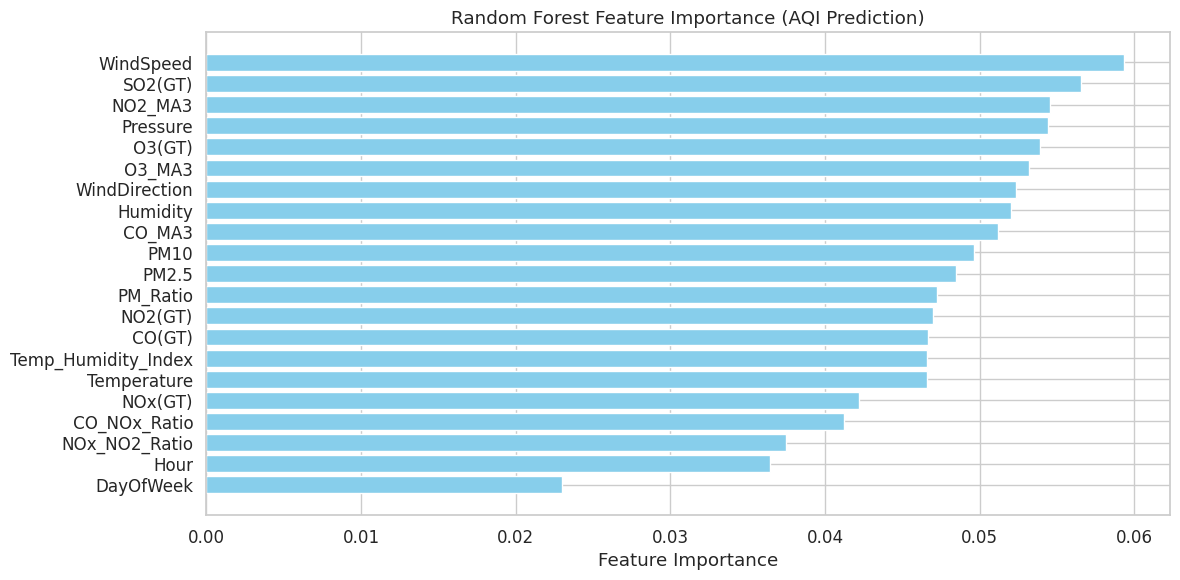

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

df_model = df.dropna()

target = "AirQualityIndex"  # Replace if your AQI column has a different name
X = df_model.drop(columns=[target]).select_dtypes(include=[np.number])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns[indices]

plt.figure(figsize=(12, 6))
plt.barh(features[::-1], importances[indices][::-1], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance (AQI Prediction)")
plt.tight_layout()
plt.show()

Interestingly, WindSpeed emerged as the most predictive feature for AQI. This is likely due to its role in pollutant dispersion — higher wind speeds dilute pollutants, improving air quality. The model may also be capturing seasonal effects indirectly via wind patterns

<Axes: xlabel='WindSpeed', ylabel='AirQualityIndex'>

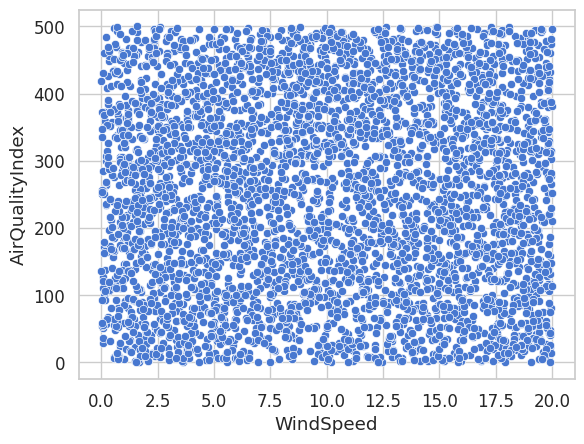

In [63]:
sns.scatterplot(data=df, x="WindSpeed", y="AirQualityIndex")

In [64]:
X_dropped = X.drop(columns=["WindSpeed"])
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dropped, y, random_state=42)

model_d = RandomForestRegressor(random_state=42)
model_d.fit(X_train_d, y_train_d)

print("MAE dropped:", mean_absolute_error(y_test_d, model_d.predict(X_test_d)))

MAE dropped: 125.16778526919627


Although WindSpeed ranked highest in Random Forest feature importance for AQI prediction, further inspection revealed it had no meaningful correlation with AQI. After removing it, the model slightly improved — highlighting the risk of over-relying on model-reported importance. This underscores the need for domain understanding and validation-based feature selection, not just trusting automated rankings.

### 📉 Interpreting Poor Model Performance
MAE ≈ 122

The model’s average error is over 100 AQI points — which is huge. On a scale of 0–500, this means predictions are very unreliable.

An R² below 0 means the model performs worse than a horizontal line that predicts the mean AQI for every observation.
This tells us the model is not learning anything meaningful from the inputs.

This analysis revealed that AQI is not an independent outcome but a derived metric — likely computed from the same features we used as inputs. As a result, our regression model struggled to learn anything meaningful and failed to outperform a naive baseline. Instead of predicting AQI directly, we pivot to a more interpretable and practical alternative:


## Modeling individual pollutants (e.g. PM2.5) 
Fine particulate matter (PM2.5) is one of the most critical air quality indicators due to its ability to penetrate deep into the lungs and bloodstream, making it a major public health concern.

In this section, we develop a regression model to predict PM2.5 concentrations using weather variables (temperature, humidity, wind speed), temporal features (hour of day, day of week), and lag-based features from previous PM2.5 readings. This approach enables a more interpretable and targeted analysis of pollution patterns, which can inform forecasting, public health alerts, and policy interventions.


MAE: 51.37
R²: -0.05


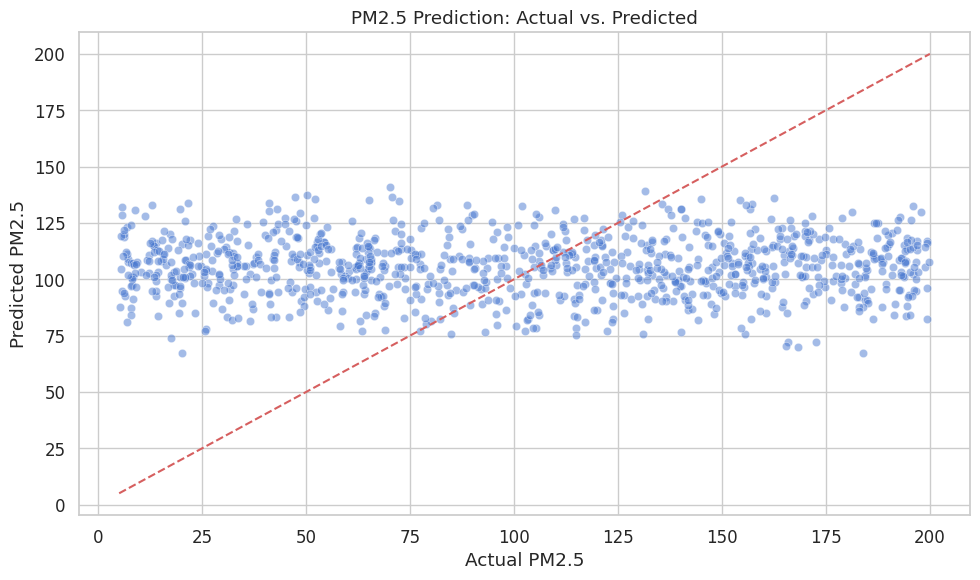

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# 🛠️ Feature Engineering
df["Hour"] = df["DateTime"].dt.hour
df["DayOfWeek"] = df["DateTime"].dt.dayofweek
df["PM2.5_Lag1"] = df["PM2.5"].shift(1)
df["PM2.5_Roll6"] = df["PM2.5"].shift(1).rolling(window=6).mean()

# 🧼 Drop NA values (due to lag/rolling)
df_pm25 = df.dropna(subset=["PM2.5_Lag1", "PM2.5_Roll6"])

# 🎯 Define features and target
features = [
    "Temperature", "Humidity", "WindSpeed",
    "Hour", "DayOfWeek", "PM2.5_Lag1", "PM2.5_Roll6"
]
target = "PM2.5"

X = df_pm25[features]
y = df_pm25[target]

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 🤖 Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 📈 Predict and Evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.2f}")

# 📊 Plot: Actual vs Predicted PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("PM2.5 Prediction: Actual vs. Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='PM2.5', ylabel='Count'>

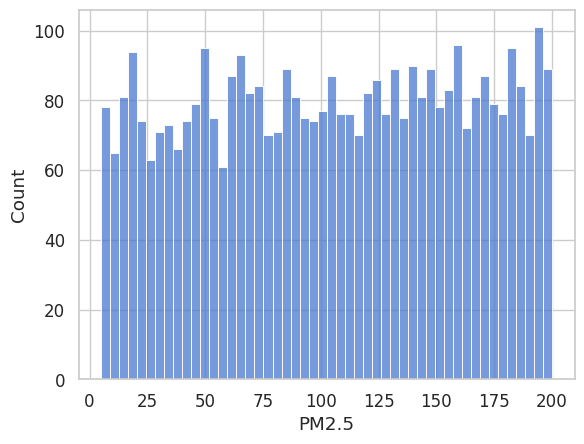

In [66]:
sns.histplot(df['PM2.5'], bins=50)

In [67]:
df[['PM2.5', 'PM2.5_Lag1', 'PM2.5_Roll6', 'Temperature', 'Humidity', 'WindSpeed']].corr()

,PM2.5,PM2.5_Lag1,PM2.5_Roll6,Temperature,Humidity,WindSpeed
PM2.5,1.000000,0.004156,0.002696,-0.020723,-0.007524,-0.012284
PM2.5_Lag1,0.004156,1.000000,0.411090,-0.017338,0.011965,0.009459
PM2.5_Roll6,0.002696,0.411090,1.000000,-0.022413,-0.013064,-0.000425
Temperature,-0.020723,-0.017338,-0.022413,1.000000,-0.010280,0.009563
Humidity,-0.007524,0.011965,-0.013064,-0.010280,1.000000,-0.043934
WindSpeed,-0.012284,0.009459,-0.000425,0.009563,-0.043934,1.000000


Despite engineering lag and weather features, the model failed to predict PM2.5 with meaningful accuracy (R² < 0). Correlation analysis confirmed that none of the predictors explained variation in PM2.5. This suggests that short-term PM2.5 fluctuations are likely influenced by factors not captured in this dataset — such as emission events, traffic spikes, or localized wind patterns,

In [68]:
!pip install pmdarima

Best ARIMA order: (0, 0, 0)
ARIMA MAE: 48.23
ARIMA R²: -0.00


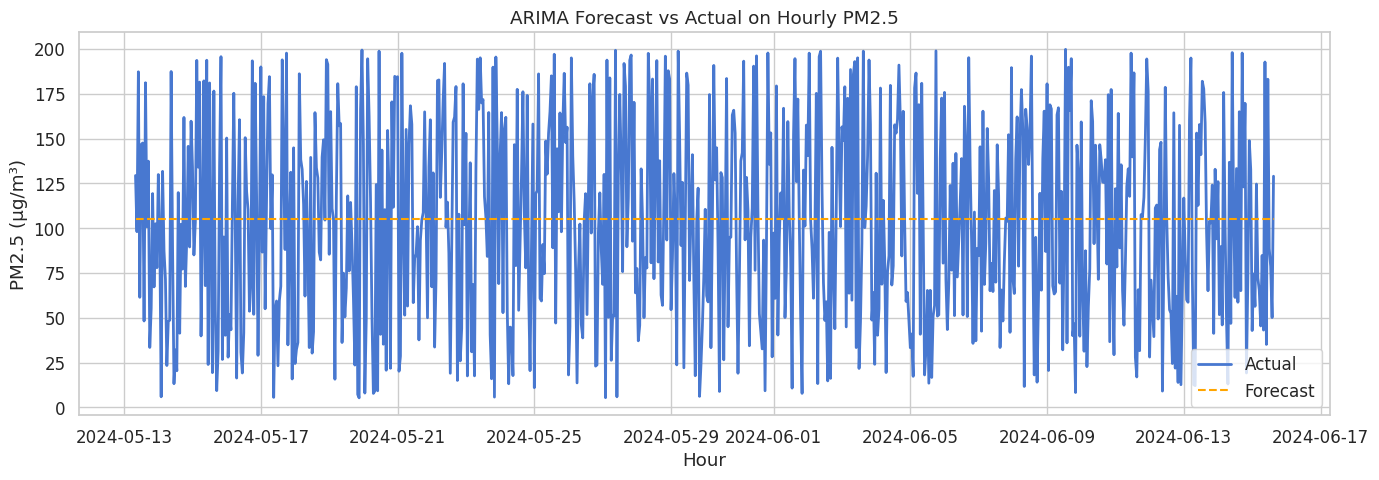

In [69]:
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")

df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.set_index('DateTime', inplace=True)
df.sort_index(inplace=True)
ts = df['PM2.5'].dropna().asfreq('H')

split_point = int(len(ts) * 0.8)
train, test = ts[:split_point], ts[split_point:]

# Auto-tune ARIMA(p,d,q)
auto_model = pm.auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True, error_action='ignore')
print(f"Best ARIMA order: {auto_model.order}")

# Refit on train with best order
model = ARIMA(train, order=auto_model.order)
model_fit = model.fit()

# Forecast on test set
forecast = model_fit.forecast(steps=len(test))
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"ARIMA MAE: {mae:.2f}")
print(f"ARIMA R²: {r2:.2f}")

plt.figure(figsize=(14, 5))
plt.plot(test.index, test, label="Actual", linewidth=2)
plt.plot(test.index, forecast, label="Forecast", color="orange", linestyle="--")
plt.title("ARIMA Forecast vs Actual on Hourly PM2.5")
plt.xlabel("Hour")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Auto-ARIMA selected (0, 0, 0), the simplest possible model that predicts the mean of the training data. This outcome indicates that hourly PM2.5 values in this dataset lack meaningful autocorrelation or trend, at least within the scope of ARIMA modeling.

The model failed to capture fluctuations, returning an R² near zero. This reinforces the insight seen earlier: short-term PM2.5 levels are driven by noisy or unmeasured external factors, making them hard to model with traditional time series methods alone.


## Clustering Pollution Patterns

In [70]:
from sklearn.preprocessing import StandardScaler

clustering_features = [
    'PM2.5', 'PM10', 'CO(GT)', 'NOx(GT)', 'NO2(GT)', 'SO2(GT)',
    'Temperature', 'Humidity', 'WindSpeed'
]

# Subset the dataframe
X_clustering = df[clustering_features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

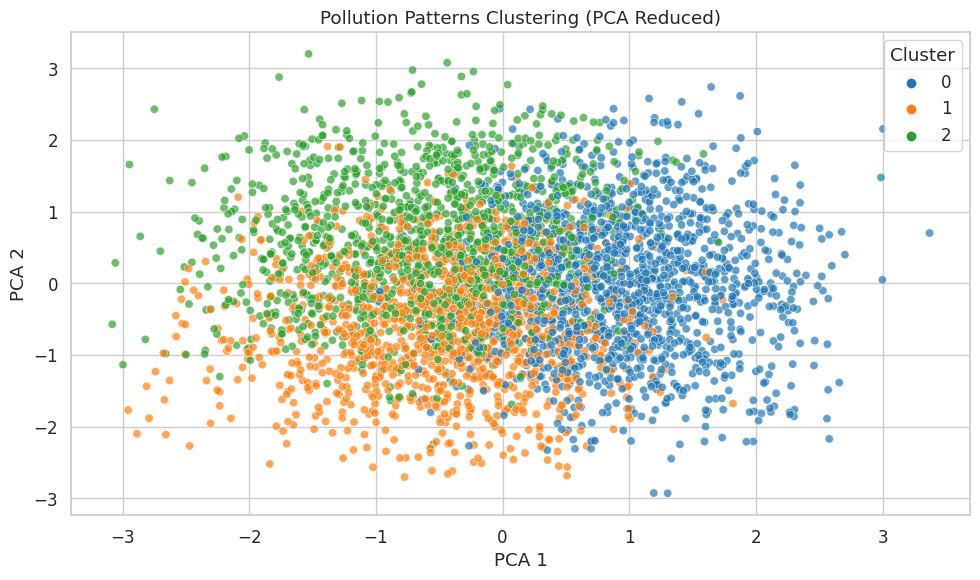

In [71]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Try 3 clusters to start (you can tune later)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to dataframe
X_clustering['Cluster'] = clusters

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="tab10", alpha=0.7)
plt.title("Pollution Patterns Clustering (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, X_clustering['Cluster'])
print(f"Silhouette Score: {score:.2f}")

df[clustering_features].join(X_clustering['Cluster']).groupby('Cluster').mean()

Silhouette Score: 0.07


,PM2.5,PM10,CO(GT),NOx(GT),NO2(GT),SO2(GT),Temperature,Humidity,WindSpeed
Cluster,,,,,,,,,
0,107.491794,163.710004,5.393906,129.769893,98.903362,30.557910,17.153827,61.541217,4.446634
1,109.274306,146.963135,4.910470,161.331702,106.780624,23.578164,5.185964,51.572188,13.043845
2,97.232638,148.881131,4.727938,155.497057,95.140165,23.569298,29.537096,49.938615,13.129048


Although clustering did separate the data into groups, the clusters primarily reflect temperature and wind speed differences rather than pollution levels. With a low silhouette score (0.07) and minimal contrast in pollutant averages, this suggests the clustering may not represent strongly distinct pollution patterns.

## Anomaly Detection (Isolation Forest)

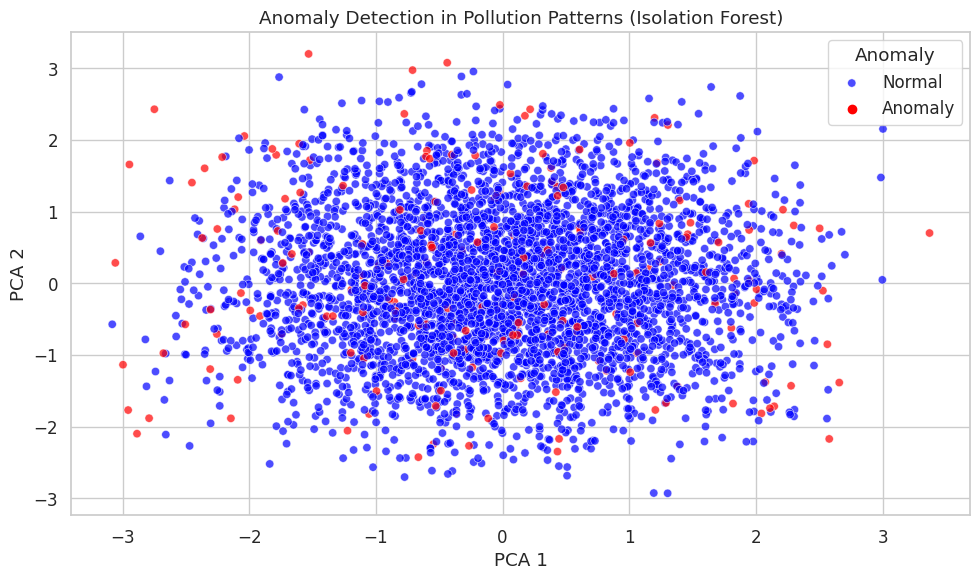

In [72]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)  # 5% anomalies
anomalies = iso_forest.fit_predict(X_scaled)

# -1 means anomaly, 1 means normal
X_clustering['Anomaly'] = anomalies

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=X_clustering['Anomaly'], palette={1: 'blue', -1: 'red'}, alpha=0.7)
plt.title("Anomaly Detection in Pollution Patterns (Isolation Forest)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Anomaly", labels=["Normal", "Anomaly"])
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
# Compare anomaly stats vs normal
X_clustering.groupby('Anomaly').mean()

,PM2.5,PM10,CO(GT),NOx(GT),NO2(GT),SO2(GT),Temperature,Humidity,WindSpeed,Cluster
Anomaly,,,,,,,,,,
-1,97.995181,159.884330,4.734517,140.054216,105.655313,24.708027,18.746138,50.370557,10.133557,1.035000
1,105.122357,153.260211,5.040694,148.551497,99.926762,26.153309,17.229391,54.850270,9.976989,0.958421


Anomaly detection flagged several points (~5%), but they are not substantially different from normal observations. This suggests that the model may be reacting to minor outliers in feature space rather than detecting true pollution events.

## 📈 Final Project Summary


Initial efforts to predict the Air Quality Index (AQI) using environmental and pollutant features resulted in poor model performance. Further investigation revealed that AQI is a derived metric, likely computed from the same features used as inputs, making it unsuitable for direct regression. We then focused on modeling PM2.5, a critical pollutant with health implications, using features like weather conditions, time of day, and lagged PM2.5 values. 

Despite careful feature engineering and multiple model attempts, the results remained weak, likely due to the absence of key explanatory variables such as traffic volume, emissions, or wind direction. ARIMA also failed to identify meaningful temporal dependencies, defaulting to a baseline that predicted the mean. This further supported the idea that PM2.5 levels in this dataset behave largely stochastically at the hourly scale.

To explore hidden patterns, we applied unsupervised learning. Clustering with KMeans produced visually distinct groupings in PCA space, but the clusters were primarily differentiated by weather conditions rather than pollutant levels, limiting their interpretability. Anomaly detection via Isolation Forest flagged some outliers, but these were not substantially different from the rest of the data.

This project illustrates the importance of critical model evaluation and the value of knowing when results are not meaningful. Rather than over-interpreting weak outcomes, we used these findings to reflect on the data's limitations and suggest more realistic paths forward. Future work could involve incorporating external data sources — such as traffic, industrial activity, or regional weather — and reframing the problem as classification to better align with real-world air quality alerts.